
# 📚 Survey Data Analysis Report (Final Version with Bonus Analyses)
**Course:** Graduate Survey Design and Analysis  
**Project:** Land Use Decisions and Cropland Patterns in Kenya  
**Submission:** Full Data Analysis Report (.ipynb)  
---



## Variable Label Key
| Variable Code | Variable Meaning |
|:--------------|:-----------------|
| GENDER | Gender of respondent |
| EDUCATION | Highest education level attained |
| MARKET_ACCESS | Access to agricultural markets |
| LAND_OWNED | Acres of land owned |
| RAINFALL_CHANGE | Perceived change in rainfall patterns |
| ADAPT_STRATEGIES_4_TEXT | Adaptation strategies free-text |
| FARM_CHALLENGE_7_TEXT | Farm challenges free-text |


## 1. Data Loading and Cleaning

In [11]:
!pip install contextily wordcloud

In [16]:
import warnings
warnings.filterwarnings('ignore')

import os
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

In [17]:

# Load the dataset
file_path = '/content/drive/MyDrive/CSUS834_Project_Data_Analysis/cleaned_survey_data_rich.csv'
df = pd.read_csv(file_path)

# Display dataset overview
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LOCATIONLATITUDE           31 non-null     float64
 1   LOCATIONLONGITUDE          31 non-null     float64
 2   Q_RECAPTCHASCORE           31 non-null     float64
 3   CONSENT_STATEMENT          31 non-null     object 
 4   GENDER                     31 non-null     int64  
 5   AGE                        31 non-null     int64  
 6   HOUSEHOLD                  31 non-null     int64  
 7   EDUCATION                  31 non-null     int64  
 8   OCCUPATION                 31 non-null     int64  
 9   LAND_OWNED                 29 non-null     float64
 10  PLOTS_CULTIVATED           29 non-null     float64
 11  LAST_SEASON_CROPS          29 non-null     object 
 12  LAST_SEASON_CROPS_1_TEXT   3 non-null      object 
 13  LAST_SEASON_CROPS_2_TEXT   2 non-null      object 
 

## 2. Exploratory Data Analysis (EDA)

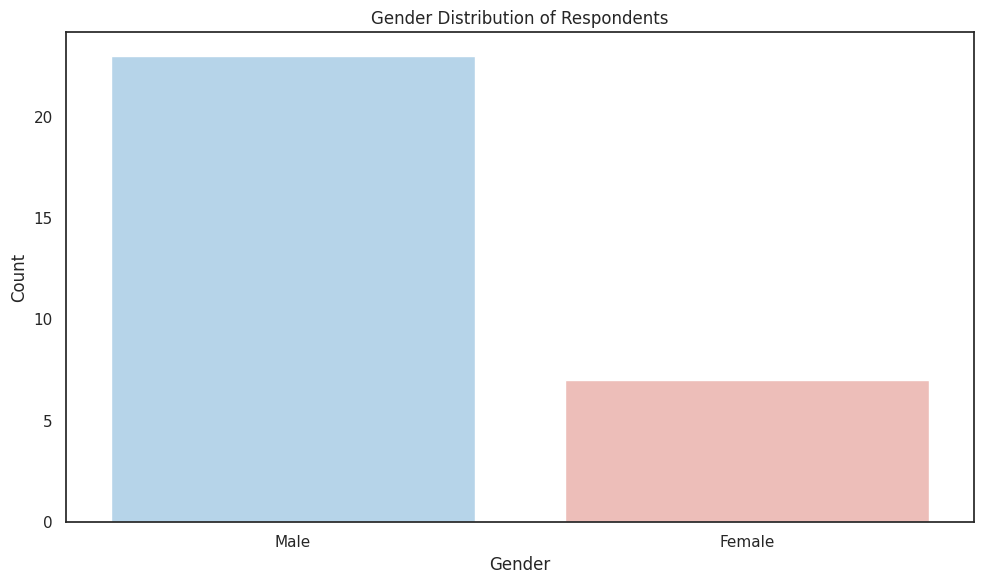

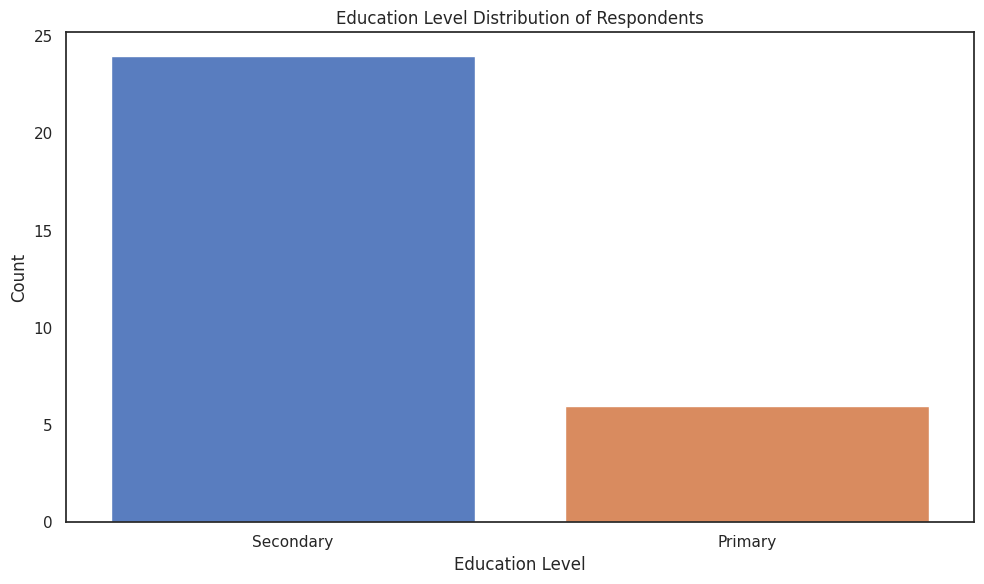

In [18]:

import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="white")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["savefig.dpi"] = 300

# Define mappings
gender_key = {0: "Female", 1: "Male"}
education_key = {0: "Primary", 1: "Secondary", 2: "College", 3: "Postgrad"}
market_key = {0: "No Market Access", 1: "Has Market Access"}
rainfall_key = {0: "Decreased", 1: "No Change", 2: "Increased"}

# Gender distribution
sns.countplot(x=df['GENDER'].map(gender_key), palette=['#AED6F1', '#F5B7B1'])
plt.title('Gender Distribution of Respondents')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Education distribution
sns.countplot(x=df['EDUCATION'].map(education_key), palette='muted')
plt.title('Education Level Distribution of Respondents')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


## 2.3 Education vs Market Access: Heatmap

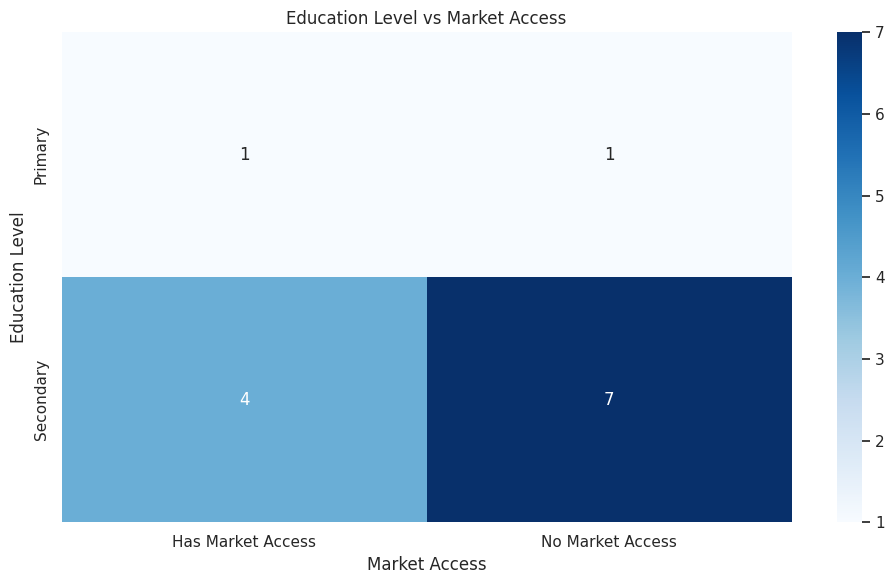

In [19]:
# Cross-tab Education vs Market Access
xtab = pd.crosstab(df['EDUCATION'].map(education_key), df['MARKET_ACCESS'].map(market_key))
sns.heatmap(xtab, annot=True, cmap='Blues', fmt='d')
plt.title('Education Level vs Market Access')
plt.xlabel('Market Access')
plt.ylabel('Education Level')
plt.tight_layout()
plt.show()

## 2.4 Mean Land Ownership by Education: Grouped Bar Plot

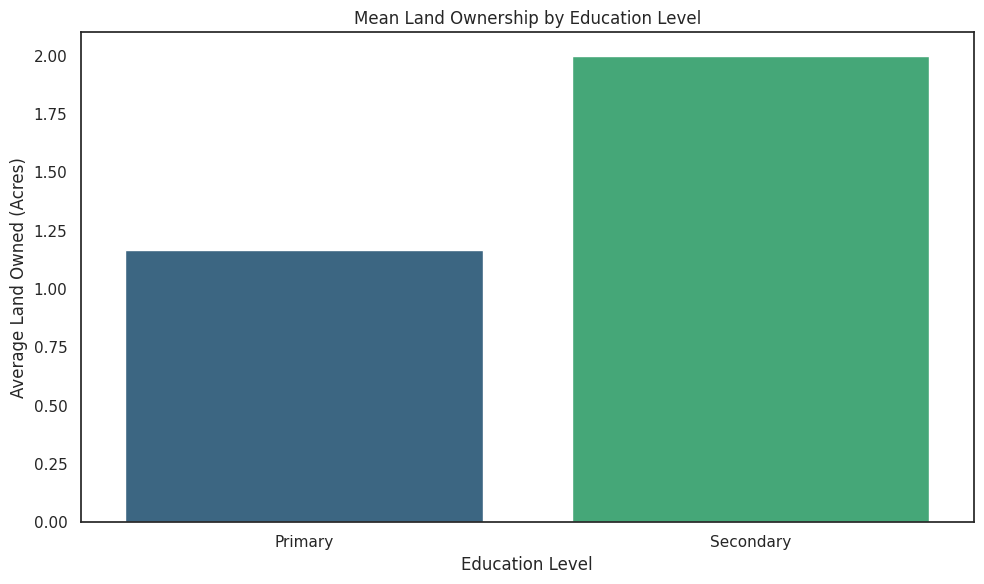

In [20]:
# Group mean land owned by education
mean_land = df.groupby('EDUCATION')['LAND_OWNED'].mean().reset_index()
mean_land['Education Level'] = mean_land['EDUCATION'].map(education_key)

sns.barplot(data=mean_land, x='Education Level', y='LAND_OWNED', palette='viridis')
plt.title('Mean Land Ownership by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Land Owned (Acres)')
plt.tight_layout()
plt.show()

## 2.5 Rainfall Change Perception vs Gender: Heatmap

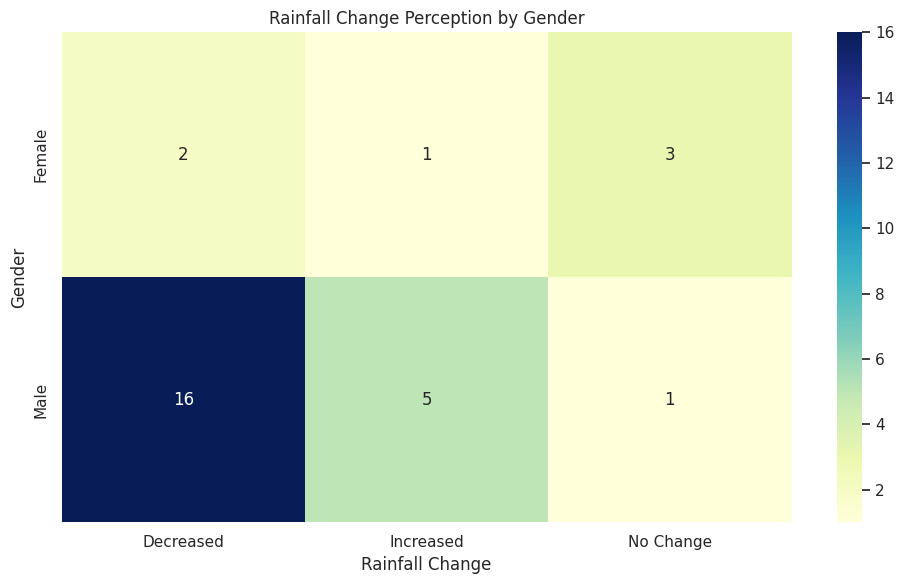

In [21]:
# Rainfall Change vs Gender
rain_xtab = pd.crosstab(df['GENDER'].map(gender_key), df['RAINFALL_CHANGE'].map(rainfall_key))
sns.heatmap(rain_xtab, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Rainfall Change Perception by Gender')
plt.xlabel('Rainfall Change')
plt.ylabel('Gender')
plt.tight_layout()
plt.show()

## 2.6 Rainfall Change Perception vs Education Level: Heatmap

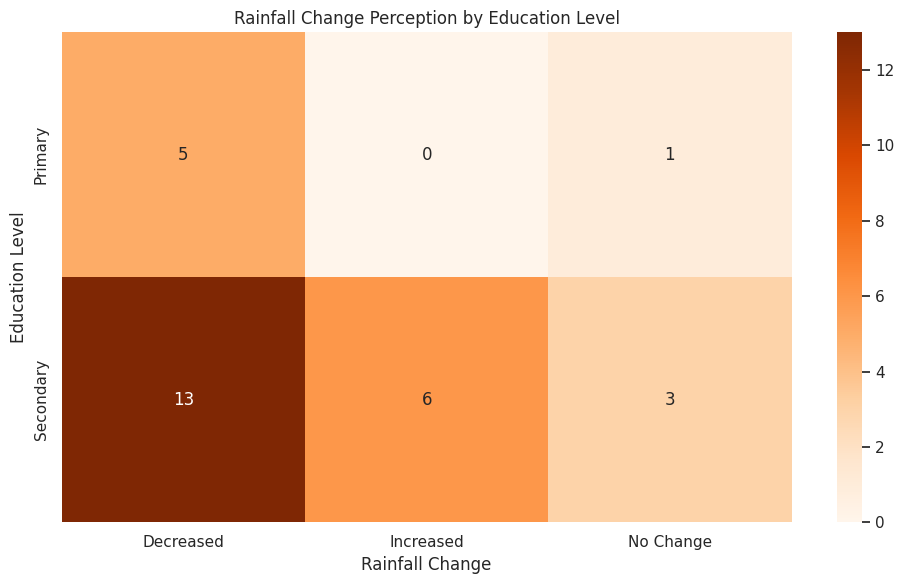

In [22]:
# Rainfall Change vs Education
rain_xtab2 = pd.crosstab(df['EDUCATION'].map(education_key), df['RAINFALL_CHANGE'].map(rainfall_key))
sns.heatmap(rain_xtab2, annot=True, cmap='Oranges', fmt='d')
plt.title('Rainfall Change Perception by Education Level')
plt.xlabel('Rainfall Change')
plt.ylabel('Education Level')
plt.tight_layout()
plt.show()


## 3. Statistical Testing

In [23]:

import scipy.stats as stats

def run_chi(var1, var2, labels1, labels2):
    df_clean = df[(df[var1] != -1) & (df[var2] != -1)]
    ct = pd.crosstab(df_clean[var1].map(labels1), df_clean[var2].map(labels2))
    chi2, p, dof, ex = stats.chi2_contingency(ct)
    print(f"Chi-square Test: {var1} vs {var2}")
    print("Chi2 =", round(chi2,2), "| p =", round(p,4))
    print(ct)
    print()

# Chi-square Tests
run_chi('EDUCATION', 'MARKET_ACCESS', education_key, market_key)
run_chi('GENDER', 'RAINFALL_CHANGE', gender_key, rainfall_key)
run_chi('EDUCATION', 'RAINFALL_CHANGE', education_key, rainfall_key)

# T-test
male_land = df[df['GENDER']==1]['LAND_OWNED'].dropna()
female_land = df[df['GENDER']==0]['LAND_OWNED'].dropna()
t_stat, p_val = stats.ttest_ind(male_land, female_land, equal_var=False)
print("T-Test: Land Owned by Gender")
print("t =", round(t_stat,2), "| p =", round(p_val,4))
print()

# ANOVA
edu_groups = [g['LAND_OWNED'].dropna() for _,g in df[df['EDUCATION'] != -1].groupby('EDUCATION')]
f_stat, p_val = stats.f_oneway(*edu_groups)
print("ANOVA: Land Ownership by Education")
print("F =", round(f_stat,2), "| p =", round(p_val,4))
print()


Chi-square Test: EDUCATION vs MARKET_ACCESS
Chi2 = 0.0 | p = 1.0
MARKET_ACCESS  Has Market Access  No Market Access
EDUCATION                                         
Primary                        1                 1
Secondary                      4                 7

Chi-square Test: GENDER vs RAINFALL_CHANGE
Chi2 = 8.04 | p = 0.018
RAINFALL_CHANGE  Decreased  Increased  No Change
GENDER                                          
Female                   2          1          3
Male                    16          5          1

Chi-square Test: EDUCATION vs RAINFALL_CHANGE
Chi2 = 2.1 | p = 0.3504
RAINFALL_CHANGE  Decreased  Increased  No Change
EDUCATION                                       
Primary                  5          0          1
Secondary               13          6          3

T-Test: Land Owned by Gender
t = 0.32 | p = 0.758

ANOVA: Land Ownership by Education
F = 3.59 | p = 0.0688



## 4. Regression Analysis

In [24]:

import statsmodels.formula.api as smf

# Create categorized columns
df['GENDER_CAT'] = df['GENDER'].map({0: 'Female', 1: 'Male'})
df['EDU_CAT'] = df['EDUCATION'].map({0: 'Primary', 1: 'Secondary', 2: 'College', 3: 'Postgrad'})
df['MARKET_CAT'] = df['MARKET_ACCESS'].map({0: 'No Market Access', 1: 'Has Market Access'})
df['RAIN_CAT'] = df['RAINFALL_CHANGE'].map({0: 'Decreased', 1: 'No Change', 2: 'Increased'})

model = smf.ols('LAND_OWNED ~ C(GENDER_CAT) + C(EDU_CAT) + C(MARKET_CAT) + C(RAIN_CAT)', data=df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             LAND_OWNED   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.041
Date:                Sat, 26 Apr 2025   Prob (F-statistic):              0.425
Time:                        06:30:17   Log-Likelihood:                -13.268
No. Observations:                  12   AIC:                             34.54
Df Residuals:                       8   BIC:                             36.48
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

## 5. Geospatial Mapping

replace ne_countries/ne_110m_admin_0_countries.README.html? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace ne_countries/ne_110m_admin_0_countries.VERSION.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace ne_countries/ne_110m_admin_0_countries.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace ne_countries/ne_110m_admin_0_countries.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace ne_countries/ne_110m_admin_0_countries.prj? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace ne_countries/ne_110m_admin_0_countries.shp? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace ne_countries/ne_110m_admin_0_countries.shx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


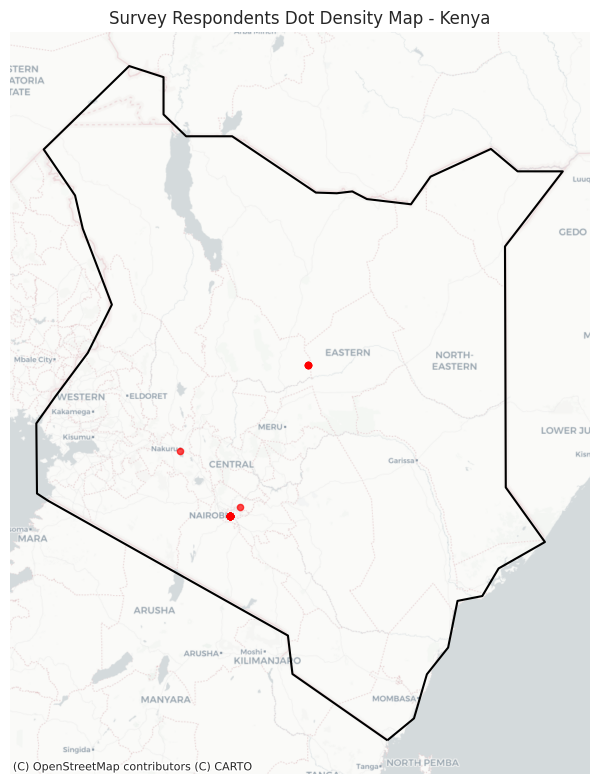

In [25]:

import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(df.dropna(subset=['LOCATIONLATITUDE', 'LOCATIONLONGITUDE']),
                       geometry=[Point(xy) for xy in zip(df['LOCATIONLONGITUDE'], df['LOCATIONLATITUDE'])],
                       crs="EPSG:4326")

# Download Kenya boundary
!wget -q https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
!unzip -q ne_110m_admin_0_countries.zip -d ne_countries
world = gpd.read_file('ne_countries/ne_110m_admin_0_countries.shp')
kenya = world[world['NAME'] == 'Kenya']

gdf = gdf.to_crs(epsg=3857)
kenya = kenya.to_crs(epsg=3857)
gdf_kenya = gdf[gdf.within(kenya.unary_union)]

fig, ax = plt.subplots(figsize=(10,8))
kenya.boundary.plot(ax=ax, color='black')
gdf_kenya.plot(ax=ax, color='red', markersize=20, alpha=0.7)
ctx.add_basemap(ax, crs=gdf_kenya.crs, source=ctx.providers.CartoDB.Positron)
plt.title('Survey Respondents Dot Density Map - Kenya')
plt.axis('off')
plt.tight_layout()
plt.show()


## 6. Bonus Analysis: Word Clouds from Open-ended Responses

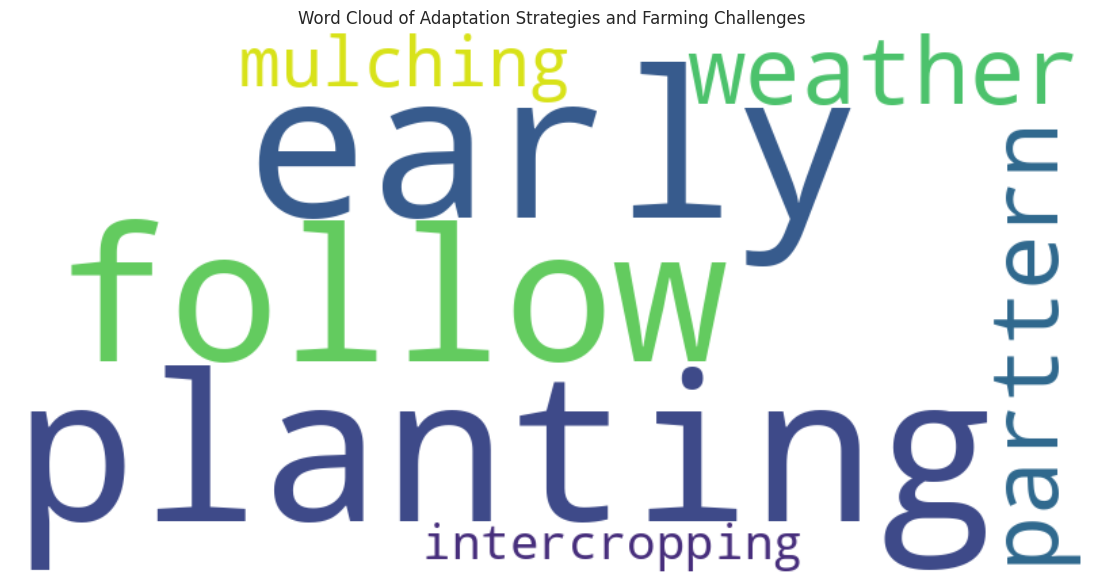

In [27]:
from wordcloud import WordCloud, STOPWORDS

# Combine text fields
text_fields = ['ADAPT_STRATEGIES_4_TEXT', 'FARM_CHALLENGE_7_TEXT']
text_data = df[text_fields].fillna('').apply(lambda x: ' '.join(x), axis=1).str.lower()

# Basic cleaning
text_combined = ' '.join(text_data)
stopwords = set(STOPWORDS)

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      stopwords=stopwords, collocations=True).generate(text_combined)

# Plot Word Cloud
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Adaptation Strategies and Farming Challenges')
plt.tight_layout()
plt.show()
